In [2]:
# importing libraries
import streamlit as st
import pandas as pd
import numpy as np
import os
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from datetime import datetime as dt
from streamlit_keplergl import keplergl_static
from pathlib import Path


In [3]:
# setting dataframe path
data = Path("C:/Users/faisa/Desktop/Data analysis/Python Specialization/Achievement 2/02 Data/Updated Data/df_2.4.csv")

In [4]:
# loading the merged dataframe of weather + trips
df = pd.read_csv(data, index_col=0)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,temperature,trip_duration,month
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,1.233333,January
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,6.266667,January
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,5.400000,January
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,0.416667,January
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,0.950000,January


In [5]:
## Groupby

df['value'] = 1 
df_groupby_bar = df.groupby('start_station_name', as_index=False).agg({'value': 'sum'})
top20 = df_groupby_bar.nlargest(20, 'value')

In [6]:
fig = go.Figure(go.Bar(x = top20['start_station_name'], y = top20['value']))
fig.show()

In [14]:
# create trips column
df['trips'] = 1

# Trips per station
top_stations = df.groupby('start_station_name')['trips'].sum().reset_index()

# Trips per day
daily_data = df.groupby('date')['trips'].sum().reset_index()

In [16]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,temperature,trip_duration,month,trips
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,1.233333,January,1
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,6.266667,January,1
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,5.400000,January,1
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,0.416667,January,1
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,0.950000,January,1


# Most popular stations

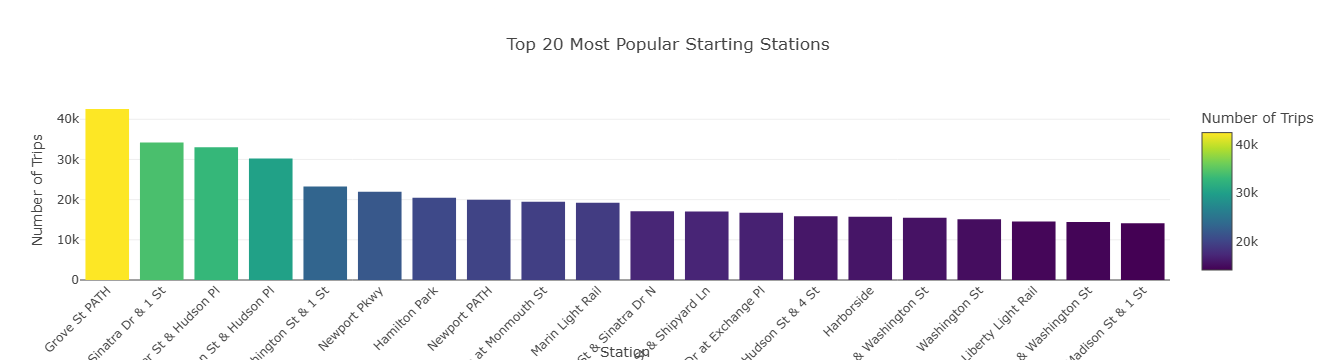

In [6]:
import plotly.express as px

# Get top 20 stations
top_stations = df["start_station_name"].value_counts().head(20).reset_index()
top_stations.columns = ["start_station_name", "trip_count"]

# Vertical bar chart
fig_bar = px.bar(
    top_stations,
    x="start_station_name",
    y="trip_count",
    title="Top 20 Most Popular Starting Stations",
    labels={"trip_count": "Number of Trips", "start_station_name": "Station"},
    color="trip_count",
    color_continuous_scale="viridis"
)

# Optional: rotate x-axis labels for readability
fig_bar.update_layout(xaxis_tickangle=-45)

fig_bar.show()


# Dual-axis line chart: Trips vs Temperature

In [7]:
# Aggregateing daily data
daily_trips = df.groupby("date")["ride_id"].count().reset_index(name="trip_count")
daily_temp = df.groupby("date")["temperature"].mean().reset_index(name="temperature")
daily = pd.merge(daily_trips, daily_temp, on="date")

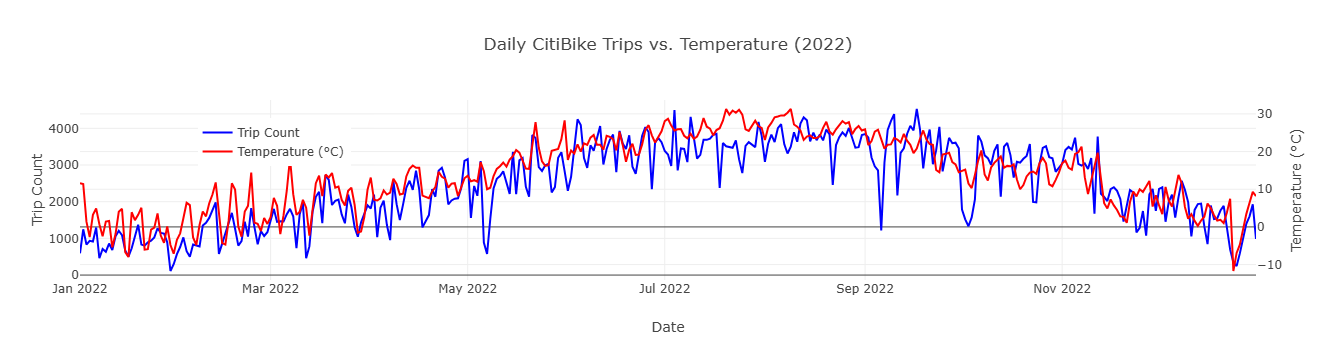

In [8]:
fig_line = go.Figure()

# Add trip counts
fig_line.add_trace(go.Scatter(
    x=daily["date"], y=daily["trip_count"],
    name="Trip Count", yaxis="y1", line=dict(color="blue")
))

# Add temperature
fig_line.add_trace(go.Scatter(
    x=daily["date"], y=daily["temperature"],
    name="Temperature (°C)", yaxis="y2", line=dict(color="red")
))

# Layout with dual axis
fig_line.update_layout(
    title="Daily CitiBike Trips vs. Temperature (2022)",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Trip Count", side="left"),
    yaxis2=dict(title="Temperature (°C)", overlaying="y", side="right"),
    legend=dict(x=0.1, y=0.9)
)
fig_line.show()


# Create Streamlit app

In [37]:
import streamlit as st
import pandas as pd 
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from streamlit_keplergl import keplergl_static 
from keplergl import KeplerGl
from datetime import datetime as dt
import plotly.express as px
from pathlib import Path

# Page config
st.set_page_config(page_title="NYC Bike Dashboard", layout="wide")
st.title("New York City Bike Dashboard")
st.write("This dashboard shows the most popular bike stations and trends of bike trips vs temperature.")

# setting dataframe path
data = Path("C:/Users/faisa/Desktop/Data analysis/Python Specialization/Achievement 2/02 Data/Updated Data/df_2.4.csv")

# loading the merged dataframe of weather + trips
df = pd.read_csv(data, index_col=0)

# create trips column
df['trips'] = 1

# Top stations bar chart
top_stations = df['start_station_name'].value_counts().head(10).reset_index()
top_stations.columns = ['station', 'trips']

fig_bar = px.bar(top_stations, x='station', y='trips', 
                 color='trips', color_continuous_scale='Viridis',
                 title='Top 10 Most Popular Bike Stations')
fig_bar.update_layout(xaxis_tickangle=-45)

st.plotly_chart(fig_bar, use_container_width=True)

# Dual-axis line chart
daily_data = df.groupby('date').agg({'trips':'sum', 'temperature':'mean'}).reset_index()

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=daily_data['date'], y=daily_data['trips'], name='Trips', yaxis='y1', mode='lines+markers'))
fig_line.add_trace(go.Scatter(x=daily_data['date'], y=daily_data['temperature'], name='Temperature', yaxis='y2', mode='lines', line=dict(dash='dash')))

fig_line.update_layout(
    title='Daily Bike Trips vs Temperature',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of Trips'),
    yaxis2=dict(title='Temperature (°C)', overlaying='y', side='right')
)

st.plotly_chart(fig_line, use_container_width=True)

# Kepler map
st.subheader("NYC Bike Trips Map")
st.write("Interactive map of bike trips.")

# Load pre-generated Kepler HTML
with open("2.5_Citibike_bike_trips.html", "r", encoding="utf-8") as f:
    kepler_html = f.read()

st.components.v1.html(kepler_html, height=600, scrolling=True)

2025-10-01 18:36:26.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:26.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 18:36:29.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()